In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob as glob
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3 #also used VGG19 but got a less accuracy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow_datasets as tfds
import tensorflow as tf
import cv2
from keras.utils import np_utils
%matplotlib inline

Using TensorFlow backend.


In [2]:
"""ds = tfds.load('malaria', shuffle_files=True)
assert isinstance(ds, tf.data.Dataset)
print(ds)"""

#can also download manually from "https://www.kaggle.com/iarunava/cell-images-for-detecting-malaria"

"ds = tfds.load('malaria', shuffle_files=True)\nassert isinstance(ds, tf.data.Dataset)\nprint(ds)"

In [3]:
incp = InceptionV3(input_shape = (200, 200, 3), 
                                include_top = False, 
                                weights = "imagenet")

for layer in incp.layers:
    layer.trainable = False
    
#inception.summary()
    

In [4]:
category_dir = glob.glob("data/train/*")
print(category_dir)

['data/train\\Parasitized', 'data/train\\Uninfected']


In [5]:
x = layers.Flatten()(incp.output)

In [6]:
x = layers.Dense(1024, activation = "relu")(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(2, activation = "softmax")(x)
model = Model(incp.input, x)
#model.summary()

In [7]:
model.compile(optimizer = "adam", 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [8]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   #rotation_range = 40,
                                   #width_shift_range = 0.2,
                                   #height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [9]:
train_dir = "data/train"
test_dir = "data/test"

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 100,
                                                    class_mode = 'categorical', 
                                                    target_size = (200, 200))

test_generator =  test_datagen.flow_from_directory( test_dir,
                                                          batch_size  = 32,
                                                          class_mode  = 'categorical', 
                                                          target_size = (200, 200))

Found 23478 images belonging to 2 classes.
Found 4080 images belonging to 2 classes.


In [10]:
"""class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99): # I kept it 70% acc because i got best result in it u can try experimenting
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True"""

'class myCallback(tf.keras.callbacks.Callback):\n  def on_epoch_end(self, epoch, logs={}):\n    if(logs.get(\'accuracy\')>0.99): # I kept it 70% acc because i got best result in it u can try experimenting\n      print("\nReached 99% accuracy so cancelling training!")\n      self.model.stop_training = True'

In [11]:
#callbacks = myCallback()

In [12]:
history = model.fit(train_generator,
                   validation_data = test_generator,
                   epochs = 15,
                   steps_per_epoch = 100,
                   validation_steps = 50)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/15
100/100 [==============================] - ETA: 8:45 - loss: 0.8380 - accuracy: 0.52 - ETA: 5:44 - loss: 4.9657 - accuracy: 0.48 - ETA: 4:43 - loss: 6.3065 - accuracy: 0.47 - ETA: 4:12 - loss: 6.0734 - accuracy: 0.48 - ETA: 3:58 - loss: 5.7353 - accuracy: 0.47 - ETA: 3:48 - loss: 4.8968 - accuracy: 0.50 - ETA: 3:36 - loss: 4.3962 - accuracy: 0.49 - ETA: 3:29 - loss: 4.0560 - accuracy: 0.50 - ETA: 3:24 - loss: 3.7637 - accuracy: 0.50 - ETA: 3:23 - loss: 3.4461 - accuracy: 0.52 - ETA: 3:19 - loss: 3.1885 - accuracy: 0.54 - ETA: 3:15 - loss: 2.9808 - accuracy: 0.55 - ETA: 3:13 - loss: 2.8117 - accuracy: 0.55 - ETA: 3:10 - loss: 2.6719 - accuracy: 0.55 - ETA: 3:07 - loss: 2.5440 - accuracy: 0.56 - ETA: 3:04 - loss: 2.4295 - accuracy: 0.56 - ETA: 3:01 - loss: 2.3175 - accuracy: 0.58 - ETA: 2:59 - loss: 2.2221 - accuracy: 0.58 - ETA: 2:57 - loss: 2.1336 - accuracy: 0.59 - ETA: 2:54 - loss:

100/100 [==============================] - ETA: 3:58 - loss: 0.2964 - accuracy: 0.87 - ETA: 3:40 - loss: 0.3219 - accuracy: 0.84 - ETA: 3:33 - loss: 0.3329 - accuracy: 0.84 - ETA: 3:28 - loss: 0.3312 - accuracy: 0.84 - ETA: 3:24 - loss: 0.3170 - accuracy: 0.86 - ETA: 3:21 - loss: 0.3225 - accuracy: 0.86 - ETA: 3:18 - loss: 0.3196 - accuracy: 0.86 - ETA: 3:15 - loss: 0.3324 - accuracy: 0.85 - ETA: 3:12 - loss: 0.3366 - accuracy: 0.85 - ETA: 3:09 - loss: 0.3511 - accuracy: 0.84 - ETA: 3:07 - loss: 0.3486 - accuracy: 0.84 - ETA: 3:04 - loss: 0.3497 - accuracy: 0.84 - ETA: 3:01 - loss: 0.3425 - accuracy: 0.85 - ETA: 2:58 - loss: 0.3414 - accuracy: 0.85 - ETA: 2:55 - loss: 0.3439 - accuracy: 0.85 - ETA: 2:52 - loss: 0.3455 - accuracy: 0.85 - ETA: 2:50 - loss: 0.3475 - accuracy: 0.85 - ETA: 2:47 - loss: 0.3466 - accuracy: 0.85 - ETA: 2:45 - loss: 0.3478 - accuracy: 0.85 - ETA: 2:43 - loss: 0.3490 - accuracy: 0.85 - ETA: 2:40 - loss: 0.3459 - accuracy: 0.85 - ETA: 2:38 - loss: 0.3481 - accura

100/100 [==============================] - ETA: 3:56 - loss: 0.3659 - accuracy: 0.85 - ETA: 3:38 - loss: 0.3781 - accuracy: 0.85 - ETA: 3:30 - loss: 0.3223 - accuracy: 0.86 - ETA: 3:26 - loss: 0.3357 - accuracy: 0.86 - ETA: 3:22 - loss: 0.3473 - accuracy: 0.84 - ETA: 3:19 - loss: 0.3631 - accuracy: 0.83 - ETA: 3:16 - loss: 0.3582 - accuracy: 0.84 - ETA: 3:13 - loss: 0.3548 - accuracy: 0.85 - ETA: 3:10 - loss: 0.3659 - accuracy: 0.84 - ETA: 3:08 - loss: 0.3679 - accuracy: 0.83 - ETA: 3:05 - loss: 0.3656 - accuracy: 0.83 - ETA: 3:02 - loss: 0.3606 - accuracy: 0.84 - ETA: 2:59 - loss: 0.3583 - accuracy: 0.84 - ETA: 2:56 - loss: 0.3688 - accuracy: 0.83 - ETA: 2:54 - loss: 0.3725 - accuracy: 0.83 - ETA: 2:51 - loss: 0.3697 - accuracy: 0.83 - ETA: 2:49 - loss: 0.3679 - accuracy: 0.83 - ETA: 2:46 - loss: 0.3693 - accuracy: 0.83 - ETA: 2:44 - loss: 0.3750 - accuracy: 0.83 - ETA: 2:41 - loss: 0.3760 - accuracy: 0.82 - ETA: 2:39 - loss: 0.3753 - accuracy: 0.83 - ETA: 2:37 - loss: 0.3727 - accura

100/100 [==============================] - ETA: 3:55 - loss: 0.3700 - accuracy: 0.82 - ETA: 3:38 - loss: 0.3376 - accuracy: 0.84 - ETA: 3:30 - loss: 0.3730 - accuracy: 0.83 - ETA: 3:25 - loss: 0.3420 - accuracy: 0.84 - ETA: 3:21 - loss: 0.3598 - accuracy: 0.84 - ETA: 3:18 - loss: 0.3556 - accuracy: 0.84 - ETA: 3:15 - loss: 0.3509 - accuracy: 0.84 - ETA: 3:13 - loss: 0.3596 - accuracy: 0.84 - ETA: 3:10 - loss: 0.3710 - accuracy: 0.84 - ETA: 3:08 - loss: 0.3630 - accuracy: 0.84 - ETA: 3:04 - loss: 0.3554 - accuracy: 0.84 - ETA: 3:01 - loss: 0.3575 - accuracy: 0.84 - ETA: 2:58 - loss: 0.3556 - accuracy: 0.85 - ETA: 2:56 - loss: 0.3523 - accuracy: 0.85 - ETA: 2:53 - loss: 0.3585 - accuracy: 0.85 - ETA: 2:50 - loss: 0.3616 - accuracy: 0.84 - ETA: 2:48 - loss: 0.3578 - accuracy: 0.84 - ETA: 2:45 - loss: 0.3526 - accuracy: 0.85 - ETA: 2:43 - loss: 0.3557 - accuracy: 0.84 - ETA: 2:41 - loss: 0.3505 - accuracy: 0.85 - ETA: 2:38 - loss: 0.3524 - accuracy: 0.85 - ETA: 2:36 - loss: 0.3521 - accura

100/100 [==============================] - ETA: 4:03 - loss: 0.2967 - accuracy: 0.87 - ETA: 3:52 - loss: 0.3009 - accuracy: 0.87 - ETA: 3:47 - loss: 0.3002 - accuracy: 0.86 - ETA: 3:42 - loss: 0.2854 - accuracy: 0.87 - ETA: 3:36 - loss: 0.3196 - accuracy: 0.85 - ETA: 3:32 - loss: 0.3052 - accuracy: 0.86 - ETA: 3:27 - loss: 0.3057 - accuracy: 0.85 - ETA: 3:23 - loss: 0.3038 - accuracy: 0.85 - ETA: 3:19 - loss: 0.3303 - accuracy: 0.84 - ETA: 3:16 - loss: 0.3263 - accuracy: 0.85 - ETA: 3:12 - loss: 0.3280 - accuracy: 0.85 - ETA: 3:08 - loss: 0.3230 - accuracy: 0.85 - ETA: 3:05 - loss: 0.3250 - accuracy: 0.85 - ETA: 3:01 - loss: 0.3322 - accuracy: 0.85 - ETA: 2:58 - loss: 0.3242 - accuracy: 0.85 - ETA: 2:55 - loss: 0.3204 - accuracy: 0.86 - ETA: 2:53 - loss: 0.3186 - accuracy: 0.86 - ETA: 2:50 - loss: 0.3171 - accuracy: 0.86 - ETA: 2:47 - loss: 0.3238 - accuracy: 0.85 - ETA: 2:45 - loss: 0.3233 - accuracy: 0.85 - ETA: 2:42 - loss: 0.3177 - accuracy: 0.86 - ETA: 2:40 - loss: 0.3146 - accura

100/100 [==============================] - ETA: 4:00 - loss: 0.3255 - accuracy: 0.85 - ETA: 3:39 - loss: 0.3209 - accuracy: 0.86 - ETA: 3:31 - loss: 0.3932 - accuracy: 0.83 - ETA: 3:26 - loss: 0.3737 - accuracy: 0.83 - ETA: 3:22 - loss: 0.3629 - accuracy: 0.84 - ETA: 3:18 - loss: 0.3489 - accuracy: 0.84 - ETA: 3:16 - loss: 0.3450 - accuracy: 0.85 - ETA: 3:13 - loss: 0.3428 - accuracy: 0.85 - ETA: 3:11 - loss: 0.3274 - accuracy: 0.86 - ETA: 3:08 - loss: 0.3221 - accuracy: 0.86 - ETA: 3:04 - loss: 0.3242 - accuracy: 0.86 - ETA: 3:01 - loss: 0.3278 - accuracy: 0.86 - ETA: 2:58 - loss: 0.3279 - accuracy: 0.86 - ETA: 2:55 - loss: 0.3271 - accuracy: 0.86 - ETA: 2:53 - loss: 0.3216 - accuracy: 0.87 - ETA: 2:50 - loss: 0.3247 - accuracy: 0.87 - ETA: 2:48 - loss: 0.3290 - accuracy: 0.87 - ETA: 2:45 - loss: 0.3288 - accuracy: 0.87 - ETA: 2:43 - loss: 0.3351 - accuracy: 0.86 - ETA: 2:41 - loss: 0.3296 - accuracy: 0.86 - ETA: 2:38 - loss: 0.3274 - accuracy: 0.86 - ETA: 2:36 - loss: 0.3244 - accura

100/100 [==============================] - ETA: 3:58 - loss: 0.4123 - accuracy: 0.75 - ETA: 3:39 - loss: 0.3572 - accuracy: 0.81 - ETA: 3:32 - loss: 0.3649 - accuracy: 0.81 - ETA: 3:27 - loss: 0.3464 - accuracy: 0.83 - ETA: 3:22 - loss: 0.3452 - accuracy: 0.83 - ETA: 3:19 - loss: 0.3345 - accuracy: 0.84 - ETA: 3:16 - loss: 0.3380 - accuracy: 0.84 - ETA: 3:14 - loss: 0.3512 - accuracy: 0.84 - ETA: 3:11 - loss: 0.3551 - accuracy: 0.84 - ETA: 3:08 - loss: 0.3486 - accuracy: 0.84 - ETA: 3:05 - loss: 0.3483 - accuracy: 0.84 - ETA: 3:02 - loss: 0.3391 - accuracy: 0.85 - ETA: 2:59 - loss: 0.3401 - accuracy: 0.84 - ETA: 2:56 - loss: 0.3391 - accuracy: 0.84 - ETA: 2:54 - loss: 0.3337 - accuracy: 0.85 - ETA: 2:51 - loss: 0.3339 - accuracy: 0.85 - ETA: 2:48 - loss: 0.3360 - accuracy: 0.84 - ETA: 2:46 - loss: 0.3351 - accuracy: 0.84 - ETA: 2:44 - loss: 0.3306 - accuracy: 0.85 - ETA: 2:42 - loss: 0.3265 - accuracy: 0.85 - ETA: 2:40 - loss: 0.3276 - accuracy: 0.85 - ETA: 2:38 - loss: 0.3252 - accura

100/100 [==============================] - ETA: 4:02 - loss: 0.3640 - accuracy: 0.85 - ETA: 3:43 - loss: 0.3963 - accuracy: 0.83 - ETA: 3:36 - loss: 0.3613 - accuracy: 0.84 - ETA: 3:30 - loss: 0.3348 - accuracy: 0.85 - ETA: 3:25 - loss: 0.3411 - accuracy: 0.85 - ETA: 3:21 - loss: 0.3233 - accuracy: 0.86 - ETA: 3:17 - loss: 0.3307 - accuracy: 0.86 - ETA: 3:15 - loss: 0.3222 - accuracy: 0.86 - ETA: 3:12 - loss: 0.3225 - accuracy: 0.86 - ETA: 3:10 - loss: 0.3200 - accuracy: 0.87 - ETA: 3:06 - loss: 0.3164 - accuracy: 0.87 - ETA: 3:03 - loss: 0.3174 - accuracy: 0.87 - ETA: 3:00 - loss: 0.3198 - accuracy: 0.87 - ETA: 2:57 - loss: 0.3163 - accuracy: 0.87 - ETA: 2:54 - loss: 0.3186 - accuracy: 0.87 - ETA: 2:52 - loss: 0.3159 - accuracy: 0.87 - ETA: 2:49 - loss: 0.3202 - accuracy: 0.86 - ETA: 2:47 - loss: 0.3206 - accuracy: 0.86 - ETA: 2:44 - loss: 0.3209 - accuracy: 0.86 - ETA: 2:42 - loss: 0.3178 - accuracy: 0.87 - ETA: 2:39 - loss: 0.3164 - accuracy: 0.87 - ETA: 2:37 - loss: 0.3144 - accura

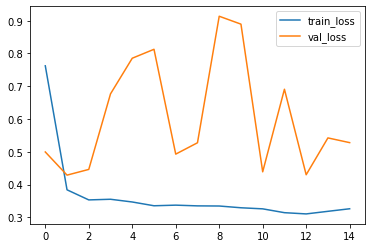

<Figure size 432x288 with 0 Axes>

In [13]:

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.legend()
plt.show()
#plt.title("LOSS")
plt.savefig("Loss_visual.png")

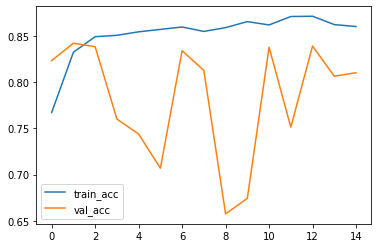

<Figure size 432x288 with 0 Axes>

In [14]:
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_accuracy"], label = "val_acc")
plt.legend()
plt.show()
#plt.title("ACCURACY")
plt.savefig("accuracy_visual.png")

In [15]:
model.save("malaria_transfer.h5")

In [2]:
model = tf.keras.models.load_model("malaria_transfer.h5")

classifier=cv2.CascadeClassifier("cascade3.xml")

labels_dict={0:"Malaria",1:"Not-Malaria"}
color_dict={0:(0,0,255),1:(0,255,0)}

img = cv2.imread("images_for_testing/test_google.png")
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cells=classifier.detectMultiScale(gray,1.3,5)  

for x,y,w,h in cells:
    try:
        
        cell_img=img[y:y+w,x:x+w]
        resized=cv2.resize(cell_img,(200, 200))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1, 200, 200,3))
        result=model.predict(reshaped)
        print(result)
        label=np.argmax(result,axis=1)[0]
        print(label)
    
    except Exception as e:
        print("Exception", e)
      
    cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
    cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
    cv2.putText(img, labels_dict[label], (x-5, y+10),cv2.FONT_HERSHEY_SIMPLEX,0.7,(255,255,255),2)
        
        
cv2.imshow("window", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[0.91253185 0.08746811]]
0
[[0.11958742 0.8804126 ]]
1
[[0.11958741 0.8804126 ]]
1
[[0.11958741 0.8804126 ]]
1
[[0.11958741 0.8804126 ]]
1
[[0.11958741 0.8804126 ]]
1
[[0.11958741 0.8804126 ]]
1
[[0.91253185 0.08746811]]
0
[[0.11958831 0.8804116 ]]
1
[[0.8880375  0.11196256]]
0
[[0.91253185 0.08746811]]
0
[[0.11958779 0.8804122 ]]
1
[[0.11958742 0.8804126 ]]
1
[[0.11958741 0.8804126 ]]
1
[[0.11977077 0.8802293 ]]
1
[[0.11990631 0.8800937 ]]
1
[[0.88846195 0.11153808]]
0
[[0.91253185 0.08746811]]
0
[[0.11958741 0.8804126 ]]
1
[[0.11958741 0.8804126 ]]
1
[[0.11958741 0.8804126 ]]
1
[[0.11958741 0.8804126 ]]
1
[[0.91253185 0.08746811]]
0
[[0.11958741 0.8804126 ]]
1
[[0.11958741 0.8804126 ]]
1
[[0.11958741 0.8804126 ]]
1
[[0.11958741 0.8804126 ]]
1
[[0.91253185 0.08746811]]
0
[[0.91253185 0.08746811]]
0
[[0.11958741 0.8804126 ]]
1
[[0.11958741 0.8804126 ]]
1
[[0.11958741 0.8804126 ]]
1
